###Importing the modules

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set(style="darkgrid")

###Statistics of Foreign Tourist Arrivals and Domestic Tourists in Spain [2000 - 2023]

##Importing the data

In [102]:
df=pd.read_csv("tourists.csv")
fta_dt=df.copy()
fta_dt.head()

,Year,FTAs in Spain (in million),% - change over previous year,DT in Spain (in million),% - change over the previous year
0,2000,46.4,2.2,14.8,2.1
1,2001,48.6,4.7,15.1,2.0
2,2002,50.3,3.5,17.2,13.9
3,2003,50.9,1.2,17.4,1.2
4,2004,52.4,2.9,18.1,4.0


###Renaming and dropping columns

In [105]:
df=pd.read_csv("tourists.csv")
df.rename(columns=({'FTAs in Spain (in million)': 'FTA', 'DT in Spain (in million)': 'DT'}), inplace = True)
df.drop('% - change over previous year',axis=1,inplace=True)
df.drop('% - change over the previous year',axis=1,inplace=True)
df.head()

,Year,FTA,DT
0,2000,46.4,14.8
1,2001,48.6,15.1
2,2002,50.3,17.2
3,2003,50.9,17.4
4,2004,52.4,18.1


###Combining columns 'FTA & DT' into a single value column and the column 'variable' will differentiate these values

In [108]:
df.melt(id_vars='Year').rename(columns={'variable': 'Tourists'})

,Year,Tourists,value
0,2000,FTA,46.4
1,2001,FTA,48.6
2,2002,FTA,50.3
3,2003,FTA,50.9
4,2004,FTA,52.4
5,2005,FTA,55.9
6,2006,FTA,58.0
7,2007,FTA,58.7
8,2008,FTA,57.2
9,2009,FTA,52.2


###Visualizing the Dataset

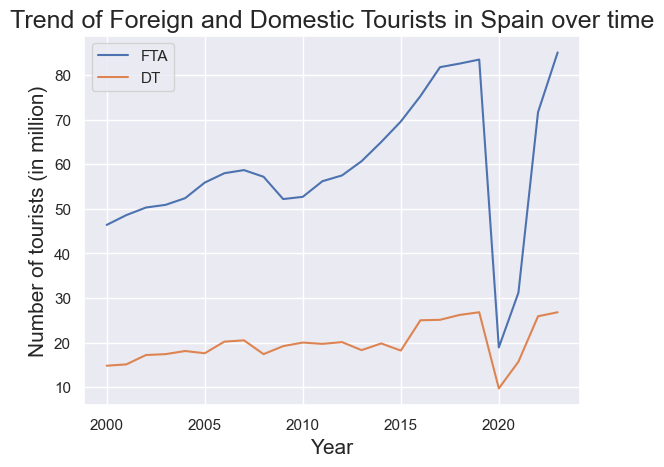

In [111]:
df.plot(x='Year', y=['FTA','DT'], kind='line')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of tourists (in million)', fontsize=15)
plt.title('Trend of Foreign and Domestic Tourists in Spain over time', fontsize=18)
plt.show()

###Quarterly distribution of tourists [2005 - 2023]

Overall foreign arrivals [2005-2023]

###Composing the dataset

In [116]:
import pandas as pd
quarterly=pd.read_csv("Spain-tourism-statistics-2005-2023-quarterly.csv").copy().rename(columns={
    '% - Distribution by quarter - 1st quarter (Jan-Mar)':'1st Quarter',
    '% - Distribution by quarter - 2nd quarter (Apr-Jun)':'2nd Quarter',
    '% - Distribution by quarter - 3rd quarter (Jul-Sep)':'3rd Quarter',
    '% - Distribution by quarter - 4th quarter (Oct-Dec)':'4th Quarter',
})
quarterly.head()

,Year,Arrivals,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
0,2005,55877317,20.2,23.0,31.3,25.5
1,2006,58089166,20.3,24.2,31.5,25.5
2,2007,58592157,21.4,24.1,30.2,19.8
3,2008,57229365,21.7,24.3,31.0,19.0
4,2009,52186339,18.2,21.8,32.5,17.5


###Shortening the Dataframe and shifting the decimal point of the values in column 'Arrivals' 6 digits to the left and rounding up to 2 decimal points

In [119]:
tot_arrivals=quarterly[['Year','Arrivals']].copy()
tot_arrivals["Arrivals"]=tot_arrivals['Arrivals']*(10**-6)
tot_arrivals=tot_arrivals.round(decimals=2)
tot_arrivals.head()

,Year,Arrivals
0,2005,55.88
1,2006,58.09
2,2007,58.59
3,2008,57.23
4,2009,52.19


##Visualization of the Data Set

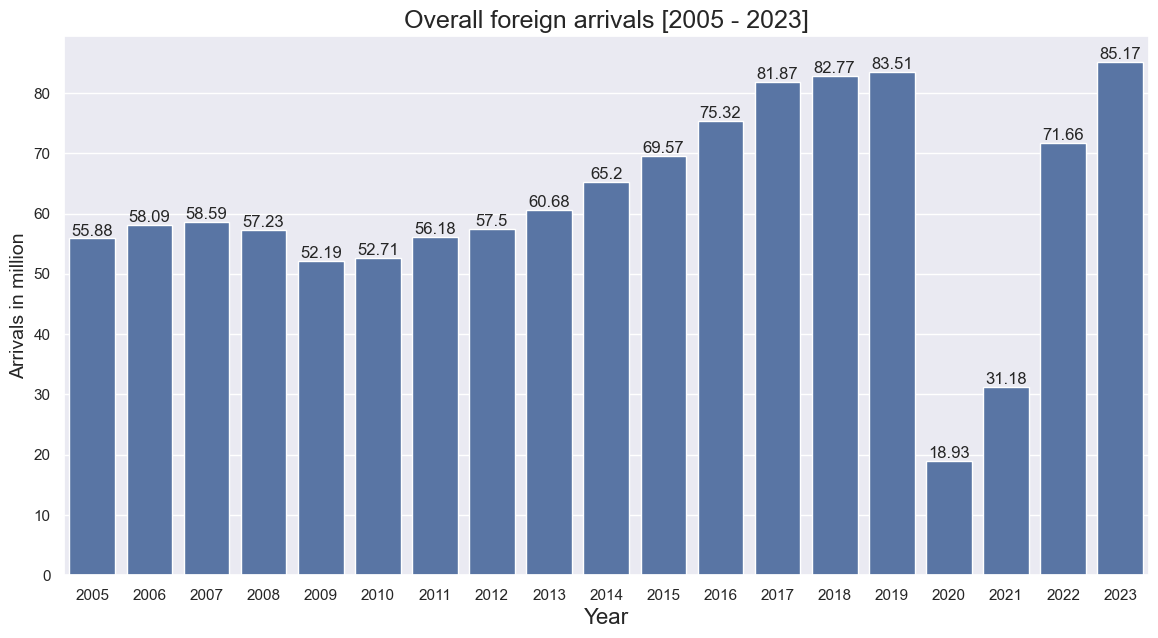

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

g=sns.barplot(x=tot_arrivals['Year'], y=tot_arrivals["Arrivals"])

plt.title("Overall foreign arrivals [2005 - 2023]", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Arrivals in million", fontsize=14)

g.bar_label(g.containers[0], fontsize=12)
    
plt.show()

###Quarterly distribution of FTAs during 2010, 2011 and 2012

In [124]:
quarterly2010=quarterly[quarterly['Year']==2010].copy()
quarterly2010=quarterly2010.drop(['Arrivals', 'Year'], axis=1)

quarterly2011=quarterly[quarterly['Year']==2011].copy()
quarterly2011=quarterly2011.drop(['Arrivals', 'Year'], axis=1)

quarterly2012=quarterly[quarterly['Year']==2012].copy()
quarterly2012=quarterly2012.drop(['Arrivals', 'Year'], axis=1)

In [127]:
quarterly2010.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
5,18.6,25.4,34.7,25.3


In [129]:
quarterly2011.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
6,20.1,24.1,30.0,25.8


In [131]:
quarterly2012.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
7,21.0,24.5,30.1,24.4


##Visualization of the Data Set

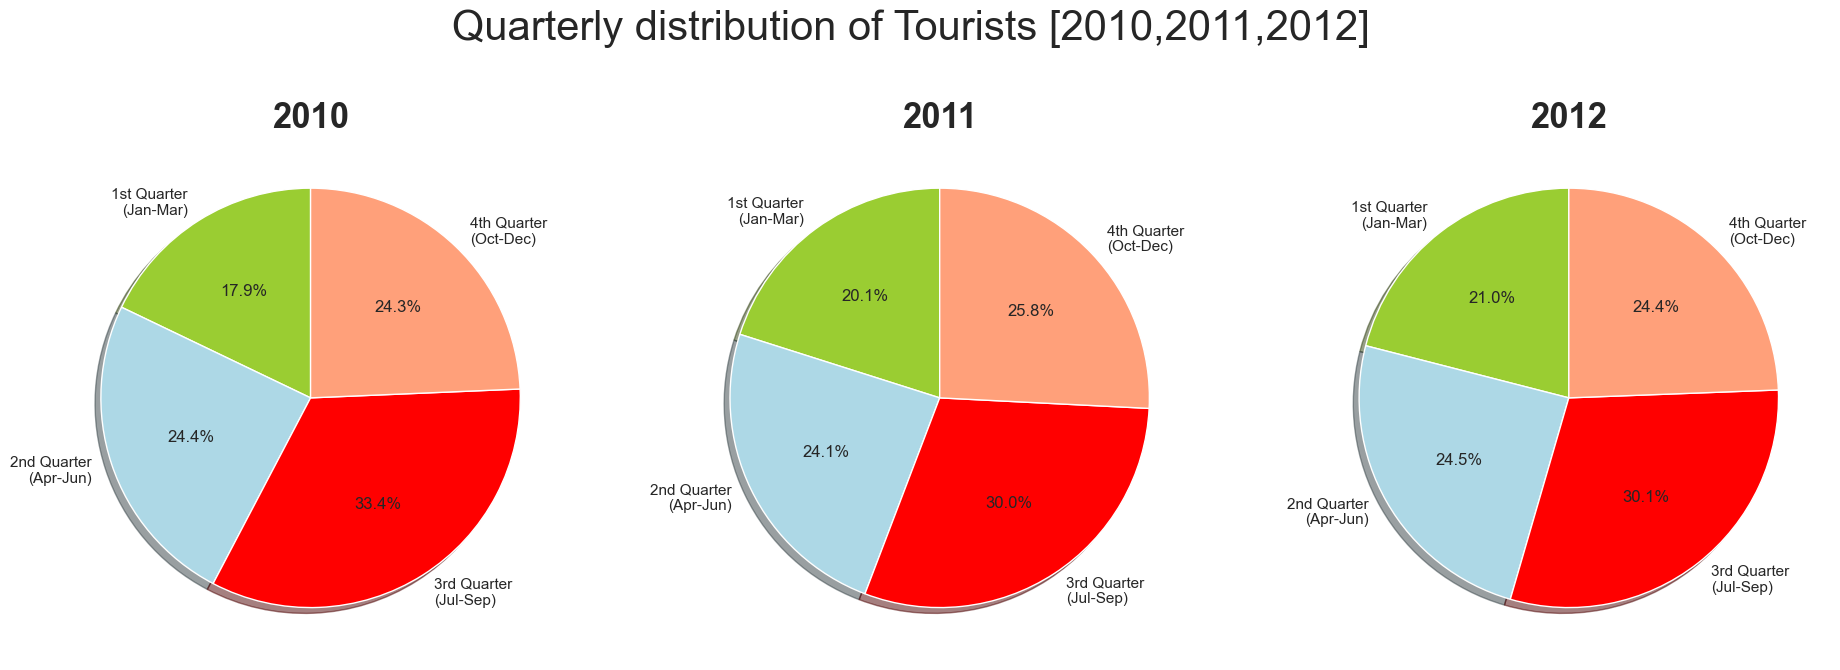

In [146]:
fig, axes = plt.subplots(1,3, sharex=True, figsize=(23,8))
fig.suptitle('Quarterly distribution of Tourists [2010,2011,2012]', fontsize=30)

quarter_labels=['1st Quarter\n(Jan-Mar)', '2nd Quarter\n(Apr-Jun)', '3rd Quarter\n(Jul-Sep)', '4th Quarter\n(Oct-Dec)']

colors = ['yellowgreen', 'lightblue', 'red', 'lightsalmon']

axes[0].pie(quarterly2010.loc[5,:].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title("2010", fontsize=25,fontweight='bold')

axes[1].pie(quarterly2011.loc[6,:].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title("2011", fontsize=25,fontweight='bold')

axes[2].pie(quarterly2012.loc[7,:].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[2].set_title("2012", fontsize=25,fontweight='bold')

plt.show()

###Average percentage distribution FTAs [2005 - 2023]

##Putting together the Data Set

In [138]:
quarter1=quarterly[['Year', '1st Quarter']].copy()
quarter2=quarterly[['Year', '2nd Quarter']].copy()
quarter3=quarterly[['Year', '3rd Quarter']].copy()
quarter4=quarterly[['Year', '4th Quarter']].copy()
# quarter.head()
# quarter2.head()
# quarter3.head()
# quarter4.head()

quarter1['1st Quarter']=quarter1['1st Quarter']*quarterly['Arrivals']/100
quarter2['2nd Quarter']=quarter2['2nd Quarter']*quarterly['Arrivals']/100
quarter3['3rd Quarter']=quarter3['3rd Quarter']*quarterly['Arrivals']/100
quarter4['4th Quarter']=quarter4['4th Quarter']*quarterly['Arrivals']/100

###Finding the average percentage for each quarter [2005 - 2023]

In [141]:
sum_arrivals=quarterly['Arrivals'].sum()

average_percentage_quarter=[
    quarter1['1st Quarter'].sum()/sum_arrivals * 100,
    quarter2['2nd Quarter'].sum()/sum_arrivals * 100,
    quarter3['3rd Quarter'].sum()/sum_arrivals * 100,
    quarter4['4th Quarter'].sum()/sum_arrivals * 100,
]

average_percentage_quarter

[21.0068719703958, 25.640893675453995, 31.13763339888757, 21.391621346372826]

##Plotting the data

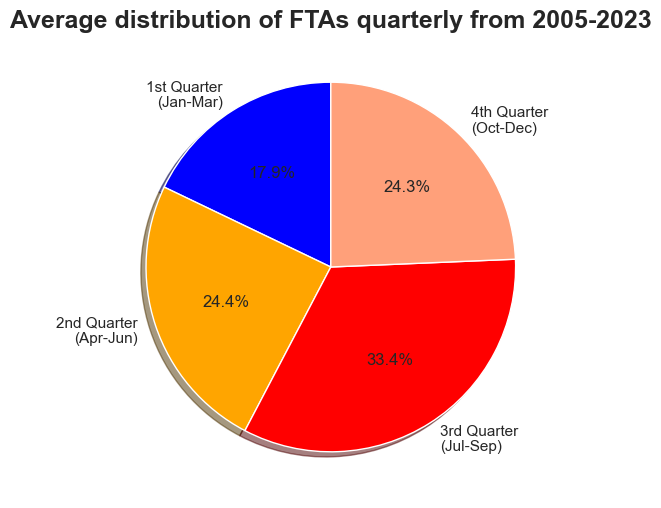

In [144]:
colors = ['yellowgreen', 'blue', 'orange', 'red', 'lightsalmon']

plt.figure(figsize=(8,6))
plt.pie(quarterly2010.loc[5,:].values.tolist(), labels=quarter_labels, colors=colors[1:],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Average distribution of FTAs quarterly from 2005-2023",fontsize=18,fontweight='bold')

plt.show()

###Statistics of the tourism market share in Spain country wise [2017-2019]

In [3]:
import pandas as pd 

market_share=pd.read_csv('contribution-to-market-share.csv')
market_share.head()

,Country,2017,2018,2019
0,UK,18806776,18502722,18012484
1,Germany,11897376,11267269,11158022
2,France,11267269,11897376,11147397
3,Italy,4222865,4382503,4534515
4,Netherlands,3704549,3848545,3684260


###Shifting the decimal point 6 places to the left

In [5]:
2017 == '2017'
2018 == '2018'
2019 == '2019'

market_share['2017'] = market_share['2017'] / 10**6
market_share['2018'] = market_share['2018'] / 10**6
market_share['2019'] = market_share['2019'] / 10**6

market_share.to_csv('modified-contribution-to-market-share.csv', index=False)

market_share.head()

,Country,2017,2018,2019
0,UK,18.806776,18.502722,18.012484
1,Germany,11.897376,11.267269,11.158022
2,France,11.267269,11.897376,11.147397
3,Italy,4.222865,4.382503,4.534515
4,Netherlands,3.704549,3.848545,3.684260


##Adding in more data

In [48]:
import pandas as pd
country_and_share=pd.read_csv('contribution-to-market-share-and-percentages.csv')
country_and_share.head()

,Country,2017,2018,2019,% share 2017,% share 2018,% share 2019
0,UK,18806776,18502722,18012484,24,23,22
1,Germany,11897376,11267269,11158022,15,14,14
2,France,11267269,11897376,11147397,14,15,14
3,Italy,4222865,4382503,4534515,5,5,5
4,Netherlands,3704549,3848545,3684260,5,5,4


In [50]:
#Dropping columns
country_and_share = country_and_share.drop(['2017', '2018', '2019'], axis=1)
country_and_share.head()

,Country,% share 2017,% share 2018,% share 2019
0,UK,24,23,22
1,Germany,15,14,14
2,France,14,15,14
3,Italy,5,5,5
4,Netherlands,5,5,4


##Visualizing the data

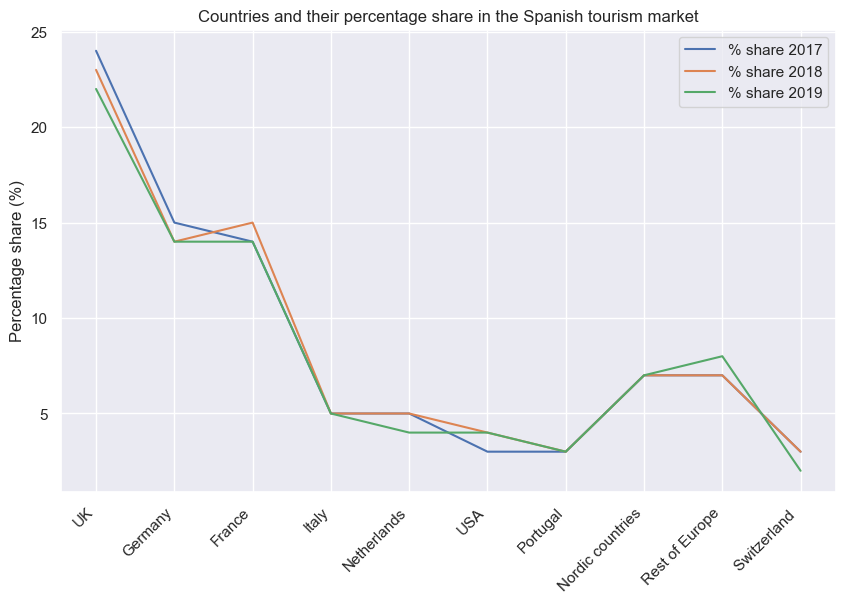

In [53]:
import matplotlib.pyplot as plt

country_and_share.plot(kind='line', figsize=(10,6))

plt.title('Countries and their percentage share in the Spanish tourism market')
plt.ylabel('Percentage share (%)')

plt.xticks(ticks=range(len(country_and_share)), labels=country_and_share['Country'], rotation=45, ha='right')

plt.show()

###Obtaining 6 countries with the highest percentage share 

In [54]:
highest_countrywise_2017=country_and_share[country_and_share['Country'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2017=highest_countrywise_2017[['Country','% share 2017']]

highest_countrywise_2017.sort_values(by=['% share 2017'],ascending=False,inplace=True)
highest_countrywise_2017=highest_countrywise_2017.iloc[0:6,:]

perc_sum=highest_countrywise_2017['% share 2017'].sum()


others_entry = pd.DataFrame.from_records([
    {'Country':'Others','% share 2017':(100-perc_sum)}
])

highest_countrywise_2017 = pd.concat([highest_countrywise_2017, others_entry], ignore_index=True)



highest_countrywise_2018=country_and_share[country_and_share['Country'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2018=highest_countrywise_2018[['Country','% share 2018']]

highest_countrywise_2018.sort_values(by=['% share 2018'],ascending=False,inplace=True)
highest_countrywise_2018=highest_countrywise_2018.iloc[0:6,:]

perc_sum=highest_countrywise_2018['% share 2018'].sum()


others_entry = pd.DataFrame.from_records([
    {'Country':'Others','% share 2018':(100-perc_sum)}
])

highest_countrywise_2018 = pd.concat([highest_countrywise_2018, others_entry], ignore_index=True)




highest_countrywise_2019=country_and_share[country_and_share['Country'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2019=highest_countrywise_2019[['Country','% share 2019']]

highest_countrywise_2019.sort_values(by=['% share 2019'],ascending=False,inplace=True)
highest_countrywise_2019=highest_countrywise_2019.iloc[0:6,:]

perc_sum=highest_countrywise_2019['% share 2019'].sum()


others_entry = pd.DataFrame.from_records([
    {'Country':'Others','% share 2019':(100-perc_sum)}
])

highest_countrywise_2019 = pd.concat([highest_countrywise_2019, others_entry], ignore_index=True)

##Visualizing the Data Set

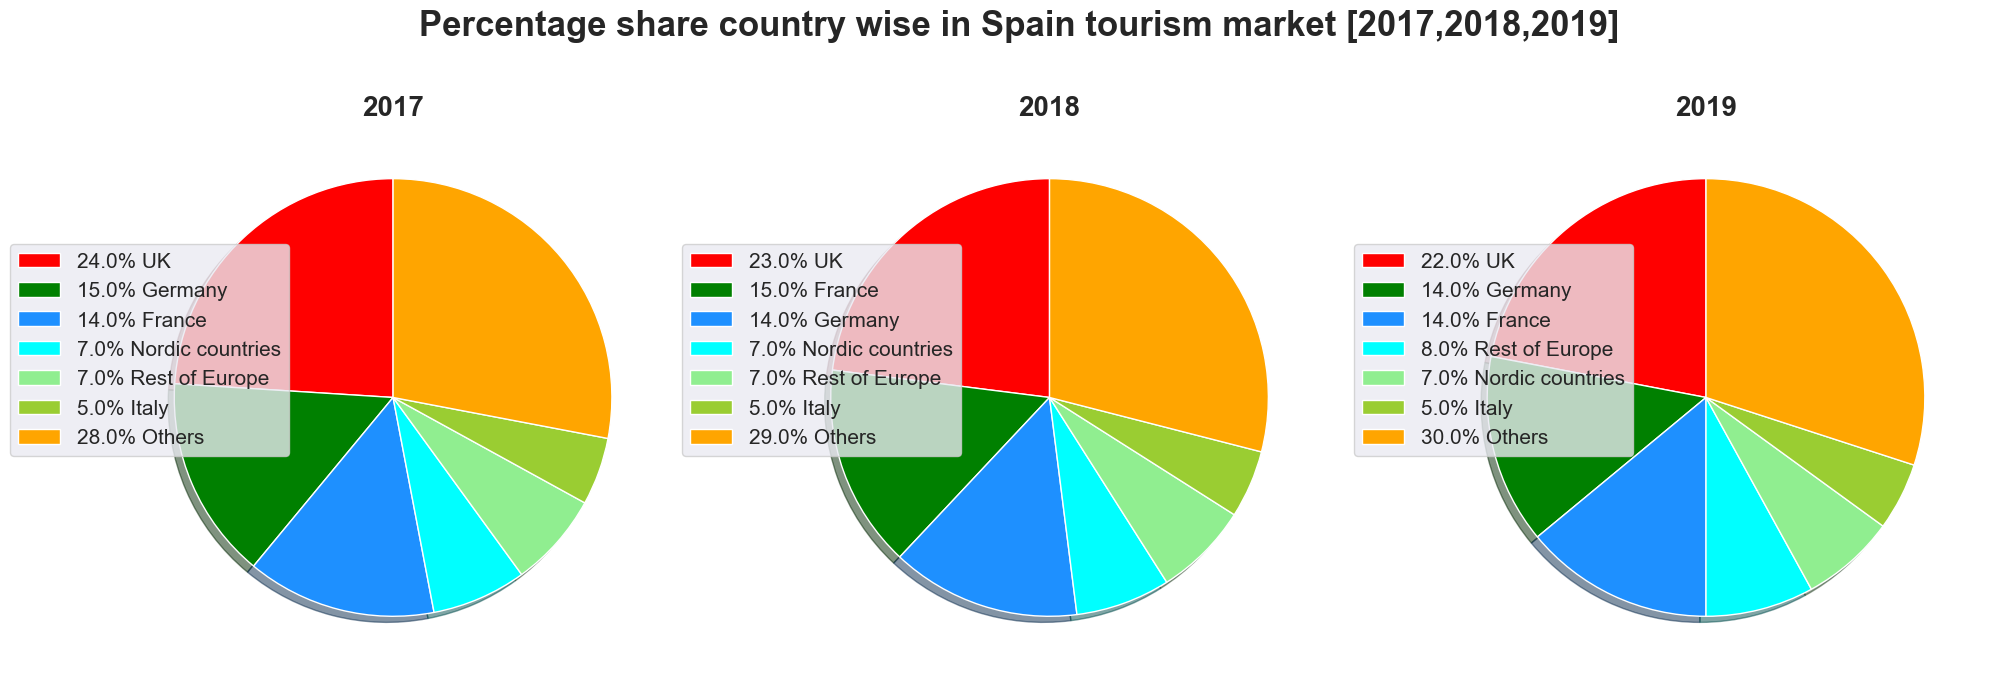

In [94]:
countries_2017 = highest_countrywise_2017['Country']
percents_2017 = highest_countrywise_2017['% share 2017']

countries_2018 = highest_countrywise_2018['Country']
percents_2018 = highest_countrywise_2018['% share 2018']

countries_2019 = highest_countrywise_2019['Country']
percents_2019 = highest_countrywise_2019['% share 2019']

fig, axs = plt.subplots(1,3, figsize=(24,8))
fig.suptitle('Percentage share country wise in Spain tourism market [2017,2018,2019]',fontsize=25,fontweight='bold')

colors = ['red', 'green', 'dodgerblue', 'aqua', 'lightgreen', 'yellowgreen', 'orange']

pie=axs[0].pie(highest_countrywise_2017['% share 2017'], colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2017['% share 2017']*100/highest_countrywise_2017['% share 2017'].sum()
axs[0].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2017['Country'])],
    bbox_to_anchor=(0.2,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axs[0].set_title("2017",fontsize=20,fontweight='bold')

pie=axs[1].pie(highest_countrywise_2018['% share 2018'], colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2018['% share 2018']*100/highest_countrywise_2018['% share 2018'].sum()
axs[1].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2018['Country'])],
    bbox_to_anchor=(0.48,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axs[1].set_title("2018",fontsize=20,fontweight='bold')

pie=axs[2].pie(highest_countrywise_2019['% share 2019'],  colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2019['% share 2019']*100/highest_countrywise_2019['% share 2019'].sum()
axs[2].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2019['Country'])],
    bbox_to_anchor=(0.76,0.7),
    loc="upper right", fontsize=15, 
    bbox_transform=plt.gcf().transFigure)
axs[2].set_title("2019",fontsize=20,fontweight='bold')

plt.show()